In [1]:
import pandas as pd
import numpy as np


In [2]:
df_kg = pd.read_csv('../../data/YAGO43kET/KG_train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

df_kg

,head,relation,tail
0,Mustafa_Yücedağ,isAffiliatedTo,Galatasaray_S.K.
1,Danny_Sonner,playsFor,FC_Erzgebirge_Aue
2,Derek_Swan,isAffiliatedTo,Dundalk_F.C.
3,Ronnie_Wallwork,isAffiliatedTo,Huddersfield_Town_F.C.
4,Mielec,isLocatedIn,Mielec_County
...,...,...,...
331682,Anthony_Shandran,isAffiliatedTo,Burnley_F.C.
331683,Hoalid_Regragui,playsFor,AC_Ajaccio
331684,Craig_Beattie,isAffiliatedTo,Heart_of_Midlothian_F.C.
331685,Diori_Hamani_International_Airport,isConnectedTo,Lomé–Tokoin_Airport


In [3]:
pairs = df_kg.groupby('relation').apply(lambda x: set(zip(x['head'], x['tail']))).to_dict()


# Compter les relations réflexives
reflexive_counts = {}
for relation, pair_set in pairs.items():
    count = sum(1 for h, t in pair_set if (t, h) in pair_set)
    reflexive_counts[relation] = count // 2  # Diviser par 2 car chaque paire est comptée deux fois

# Afficher les résultats
df_reflex = pd.DataFrame.from_dict(reflexive_counts, orient='index', columns=['reflexive_count'])
df_reflex = df_reflex.reset_index()
df_reflex.columns = ['relation', 'reflexive_count']
df_reflex

df_rel = df_kg.groupby('relation').size().reset_index(name='count')
df_rel = df_rel.merge(df_reflex, on='relation', how='left')
df_rel['reflexive_ratio'] = df_rel['reflexive_count'] / df_rel['count']
df_rel_refl = df_rel[df_rel['reflexive_ratio'] > 0.1]
df_rel_refl

C:\Users\celva\AppData\Local\Temp\ipykernel_6288\1168476077.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairs = df_kg.groupby('relation').apply(lambda x: set(zip(x['head'], x['tail']))).to_dict()


,relation,count,reflexive_count,reflexive_ratio
15,hasNeighbor,463,192,0.414687
23,isConnectedTo,21809,6208,0.284653
28,isMarriedTo,576,242,0.420139


In [9]:
df_rel

,relation,count,reflexive_count,reflexive_ratio
0,actedIn,541,0,0.000000
1,created,181,0,0.000000
2,dealsWith,1120,62,0.055357
3,diedIn,1696,0,0.000000
4,directed,91,0,0.000000
5,edited,50,0,0.000000
6,exports,206,0,0.000000
7,graduatedFrom,929,0,0.000000
8,happenedIn,984,0,0.000000
9,hasAcademicAdvisor,50,1,0.020000


In [4]:
# Pick few triplets with high reflexive ratio not reflexive

reflexive_pairs = set()

for relation, pair_set in pairs.items():
    for h, t in pair_set:
        if (t, h) in pair_set:
            reflexive_pairs.add((h, t))
            reflexive_pairs.add((t, h))


df_non_refl = df_kg[~df_kg.apply(lambda row: (row['head'], row['tail']) in reflexive_pairs, axis=1)]

In [5]:
df_non_refl[df_non_refl['relation'].isin(df_rel_refl[df_rel_refl['reflexive_ratio'] > 0.1]['relation'].values)].sample(50)

,head,relation,tail
71459,Penang_International_Airport,isConnectedTo,Suvarnabhumi_Airport
30505,John_F._Kennedy_International_Airport,isConnectedTo,Rio_de_Janeiro–Galeão_International_Airport
200218,Washington_Dulles_International_Airport,isConnectedTo,O'Hare_International_Airport
171030,Gran_Canaria_Airport,isConnectedTo,Bremen_Airport
237467,Martin_Scorsese,isMarriedTo,Isabella_Rossellini
209156,Barcelona–El_Prat_Airport,isConnectedTo,Cairo_International_Airport
196109,Brussels_Airport,isConnectedTo,Cagliari_Elmas_Airport
294257,Queen_Beatrix_International_Airport,isConnectedTo,José_María_Córdova_International_Airport
51530,Katowice_International_Airport,isConnectedTo,Robin_Hood_Airport_Doncaster_Sheffield
238081,"Bergen_Airport,_Flesland",isConnectedTo,Madeira_Airport


(-0.5, 799.5, 399.5, -0.5)

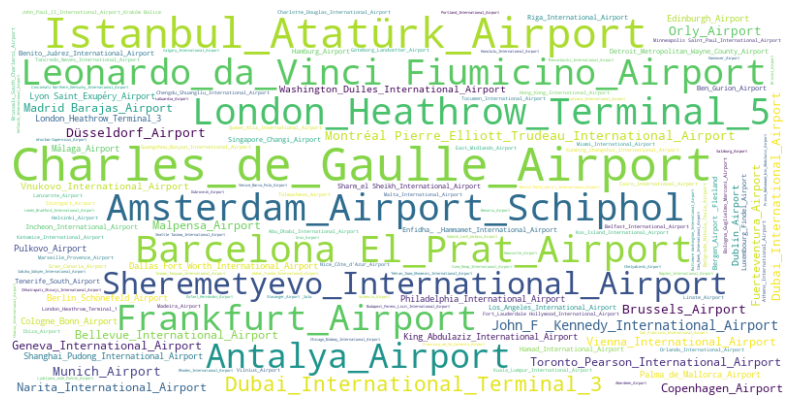

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_non_refl[df_non_refl['relation'].isin(df_rel_refl[df_rel_refl['reflexive_ratio'] > 0.1]['relation'].values)]['head'].values))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes


In [7]:
df_non_refl_lower = df_non_refl.copy()
df_non_refl_lower['head'] = df_non_refl_lower['head'].str.lower()
df_non_refl_lower['tail'] = df_non_refl_lower['tail'].str.lower()

mask = ((df_non_refl_lower['head'].str.contains('airport')) | (df_non_refl_lower['head'].str.contains('terminal')))

df_non_refl_lower[(df_non_refl_lower['relation'] == 'isConnectedTo') & mask]['head'].nunique()
df_non_refl_lower[(df_non_refl_lower['relation'] == 'isConnectedTo') & ~mask]['head'].head()

3181     vitória,_espírito_santo
4994               cfb_goose_bay
9295                 quad_cities
13223              baden_airpark
13988    vitória,_espírito_santo
Name: head, dtype: object

In [8]:
df_non_refl_lower[df_non_refl_lower['head'] == 'zizi_roberts']

,head,relation,tail
7,zizi_roberts,playsFor,a.c._milan
12356,zizi_roberts,playsFor,panionios_g.s.s.
17726,zizi_roberts,isAffiliatedTo,liberia_national_football_team
20183,zizi_roberts,isAffiliatedTo,a.c._monza_brianza_1912
46677,zizi_roberts,isAffiliatedTo,panionios_f.c
71385,zizi_roberts,playsFor,olympiacos_f.c.
77614,zizi_roberts,playsFor,ravenna_f.c.
97470,zizi_roberts,isAffiliatedTo,colorado_rapids
99249,zizi_roberts,playsFor,colorado_rapids
137896,zizi_roberts,wasBornIn,monrovia
